# 데이터 조작 연습문제

#### 1. 필요 패키지 임포트하시오.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

#### 2. seaborn에서 제공하는 타이타닉 데이터세트를 로딩하여 데이터프레임 titanic을 생성하시오.

- 타이타닉 데이터셋 로딩

In [2]:
# 타이타닉 승객 dataset 읽어오기
import seaborn as sns 

df = sns.load_dataset('titanic')

#### 3. 타이타닉 데이터의 전반적인 구조와 내용을 파악하시오.

#### 1) 데이터의 앞부분 출력

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 2) 데이터의 크기 확인

In [14]:
df.size

13365

#### 3) 데이터의 변수별 속성 확인

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 4) 데이터의 요약통계량 출력

In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 5) 데이터의 변수(컬럼)명 출력

In [17]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

#### 6) 타이타닉 승객의 생존자와 사망자 인원수 출력

In [18]:
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

#### 7) age의 분포를 히스토그램으로 그리기

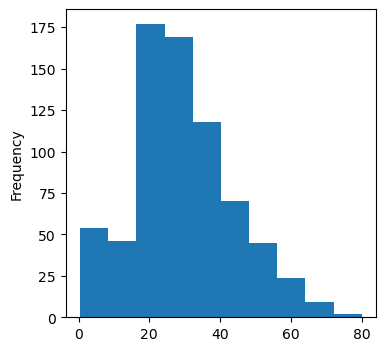

In [21]:
plt.figure(figsize=(4,4))
df.age.plot(kind='hist')
plt.show()

#### 4. 타이타닉 승객의 나이(age)를 다음 조건에 따라 범주형 데이터(age_cat)로 생성하고 titanic 데이터프레임에 추가하시오.

- bins=[0, 15, 25, 35, 60, 99]
- labels=['미성년자','청년','중년','장년','노년']

**1) 데이터 범위 설정**

In [22]:
bins=[0, 15, 25, 35, 60, 99]
labels=['미성년자','청년','중년','장년','노년']

**2) 범주형 데이터 생성**

In [23]:
# 카테고리 데이터 생성
df['age_cut'] =  pd.cut(df.age, bins=bins, labels=labels)

**3) 범주형 데이터 확인**

In [24]:
#카테고리 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cut      714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


#### 5. 타이타닉 데이터를 사망자/생존자 그룹으로 나누고(alive), 각 그룹에 대해 미성년자, 청년, 중년, 장년, 노년 승객의 비율을 구하시오.

- 각 그룹별 비율의 전체 합은 1이 되어야 한다.

**1) 데이터 셋 분리 : 생존자 그룹과 사망자 그룹**

In [29]:
# 사망자 그룹 데이터프레임 추출
df_alive_no = df[df.survived == 0]
df_alive_no

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,중년
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,장년
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,미성년자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,청년
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,장년
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,중년
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN


In [30]:
# 생존자 그룹 데이터프레임 추출
df_alive_yes = df[df.survived == 1]
df_alive_yes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,장년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,중년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,중년
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,중년
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,미성년자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True,미성년자
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,장년
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,청년
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,청년


**2) 그룹별 범주형 데이터 빈도 계산**

- 사망자 그룹의 연령대별 빈도

In [35]:
df_alive_no.age_cut.value_counts().sort_index()

age_cut
미성년자     34
청년      143
중년      113
장년      117
노년       17
Name: count, dtype: int64

In [43]:
np.round(df_alive_no.age_cut.value_counts(normalize=True).sort_index()*100, 1)

age_cut
미성년자     8.0
청년      33.7
중년      26.7
장년      27.6
노년       4.0
Name: proportion, dtype: float64

- 생존자 그룹의 연령대별 빈도

In [34]:
df_alive_yes.age_cut.value_counts().sort_index()

age_cut
미성년자    49
청년      75
중년      83
장년      78
노년       5
Name: count, dtype: int64

In [41]:
np.round(df_alive_yes.age_cut.value_counts(normalize=True).sort_index()*100, 1)

age_cut
미성년자    16.9
청년      25.9
중년      28.6
장년      26.9
노년       1.7
Name: proportion, dtype: float64

------------------------